In [1]:
import os
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# np.set_printoptions(threshold=np.inf)

In [3]:
P1_info = []
P1_command = []
P2_info = []
P2_command = []

In [4]:
dirpath = "../log"
for f in os.listdir(dirpath):
    path = os.path.join(dirpath, f)
    file = open(path,"rb")
    data = pickle.load(file)
    P1_info =  P1_info + data['ml_1P']['scene_info']
    P2_info =  P2_info + data['ml_2P']['scene_info']
    P1_command =  P1_command + data['ml_1P']['command']
    P2_command =  P2_command + data['ml_2P']['command']
    file.close()
#     print(P1_command)

In [5]:
print(len(P1_info))
print(len(P1_command))
print(len(P2_info))
print(len(P2_command))

26087
26087
26087
26087


In [6]:
#先處理P1

info = P1_info[0]

feature = np.array([info['ball'][0], info['ball'][1], info['platform_1P'][0],info['ball_speed'][0],info['ball_speed'][1]])
print(feature)

command = []
print(P1_command[0])
if P1_command[0] == 'NONE':
    command.append(0)
elif P1_command[0] == 'MOVE_LEFT':
    command.append(1)
elif P1_command[0] == 'MOVE_RIGHT':
    command.append(2)
else:
    command.append(-1)

[ 98 415  80   0   0]
SERVE_TO_LEFT


In [7]:
for i in range(1, len(P1_info) - 1):
    info = P1_info[i]
    feature = np.vstack((feature, [info['ball'][0], info['ball'][1], info['platform_1P'][0],info['ball_speed'][0],info['ball_speed'][1]]))
    if P1_command[i] == 'NONE':
        command.append(0)
    elif P1_command[i] == 'MOVE_LEFT':
        command.append(1)
    elif P1_command[i] == 'MOVE_RIGHT':
        command.append(2) 
    else:
        command.append(-1) 

answer = np.array(command)

print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[ 98 415  80   0   0]
 [ 98 415  80  -7  -7]
 [ 91 408  80  -7  -7]
 ...
 [171 416 115 -12  12]
 [160 428 120  12  12]
 [172 440 125  12  12]]
(26086, 5)
[-1  0  0 ...  2  2  2]
(26086,)


In [8]:
X = feature
y = answer
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [9]:
#從k值=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [10]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  12    4    0    0]
 [   0 4197   41   70]
 [   0   53 1665   13]
 [   1   75   10 1685]]
              precision    recall  f1-score   support

          -1       0.92      0.75      0.83        16
           0       0.97      0.97      0.97      4308
           1       0.97      0.96      0.97      1731
           2       0.95      0.95      0.95      1771

    accuracy                           0.97      7826
   macro avg       0.95      0.91      0.93      7826
weighted avg       0.97      0.97      0.97      7826



Text(0, 0.5, 'Error Rate')

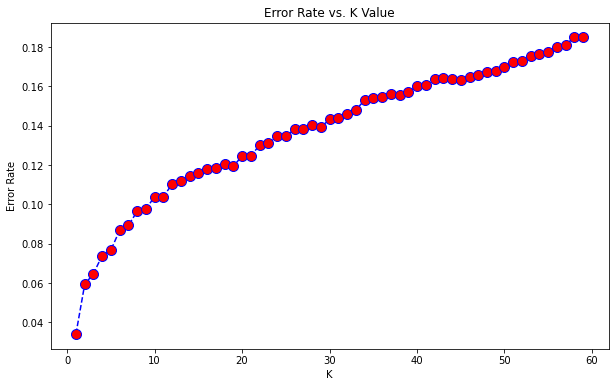

In [11]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

file = open('model_1.pickle', 'wb')
pickle.dump(knn, file)
file.close()

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[  12    4    0    0]
 [   0 4197   41   70]
 [   0   53 1665   13]
 [   1   75   10 1685]]


              precision    recall  f1-score   support

          -1       0.92      0.75      0.83        16
           0       0.97      0.97      0.97      4308
           1       0.97      0.96      0.97      1731
           2       0.95      0.95      0.95      1771

    accuracy                           0.97      7826
   macro avg       0.95      0.91      0.93      7826
weighted avg       0.97      0.97      0.97      7826



In [13]:
# #資料劃分
# x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)
# #參數區間
# param_grid = {'n_neighbors':[1, 2, 3]}
# #交叉驗證 
# cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
# grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=-1) #n_jobs為平行運算的數量
# grid.fit(x_train, y_train)
# grid_predictions = grid.predict(x_test)

# #儲存
# file = open('model_1.pickle', 'wb')
# pickle.dump(grid, file)
# file.close()

In [14]:
#P2

info = P2_info[0]

feature = np.array([info['ball'][0], info['ball'][1], info['platform_2P'][0],info['ball_speed'][0],info['ball_speed'][1]])
print(feature)

command = []
print(P2_command[0])
if P2_command[0] == 'NONE':
    command.append(0)
elif P2_command[0] == 'MOVE_LEFT':
    command.append(1)
elif P2_command[0] == 'MOVE_RIGHT':
    command.append(2)
else:
    command.append(-1)

[ 98 415  80   0   0]
SERVE_TO_LEFT


In [15]:
for i in range(1, len(P2_info) - 1):
    info = P2_info[i]
    feature = np.vstack((feature, [info['ball'][0], info['ball'][1], info['platform_1P'][0],info['ball_speed'][0],info['ball_speed'][1]]))
    if P1_command[i] == 'NONE':
        command.append(0)
    elif P1_command[i] == 'MOVE_LEFT':
        command.append(1)
    elif P1_command[i] == 'MOVE_RIGHT':
        command.append(2) 
    else:
        command.append(-1) 

answer = np.array(command)

print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[ 98 415  80   0   0]
 [ 98 415  80  -7  -7]
 [ 91 408  80  -7  -7]
 ...
 [171 416 115 -12  12]
 [160 428 120  12  12]
 [172 440 125  12  12]]
(26086, 5)
[-1  0  0 ...  2  2  2]
(26086,)


In [16]:
X = feature
y = answer
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [17]:
#從k值=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [18]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  12    4    0    0]
 [   0 4197   41   70]
 [   0   53 1665   13]
 [   1   75   10 1685]]
              precision    recall  f1-score   support

          -1       0.92      0.75      0.83        16
           0       0.97      0.97      0.97      4308
           1       0.97      0.96      0.97      1731
           2       0.95      0.95      0.95      1771

    accuracy                           0.97      7826
   macro avg       0.95      0.91      0.93      7826
weighted avg       0.97      0.97      0.97      7826



Text(0, 0.5, 'Error Rate')

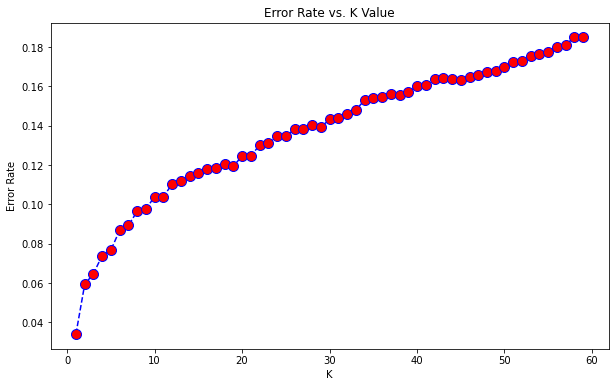

In [19]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

file = open('model_2.pickle', 'wb')
pickle.dump(knn, file)
file.close()

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[  12    4    0    0]
 [   0 4197   41   70]
 [   0   53 1665   13]
 [   1   75   10 1685]]


              precision    recall  f1-score   support

          -1       0.92      0.75      0.83        16
           0       0.97      0.97      0.97      4308
           1       0.97      0.96      0.97      1731
           2       0.95      0.95      0.95      1771

    accuracy                           0.97      7826
   macro avg       0.95      0.91      0.93      7826
weighted avg       0.97      0.97      0.97      7826



In [21]:
# #資料劃分
# x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)
# #參數區間
# param_grid = {'n_neighbors':[1, 2, 3]}
# #交叉驗證 
# cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
# grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=-1) #n_jobs為平行運算的數量
# grid.fit(x_train, y_train)
# grid_predictions = grid.predict(x_test)

# #儲存
# file = open('model_2.pickle', 'wb')
# pickle.dump(grid, file)
# file.close()